In [49]:
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.autograd import Variable
import torch
import torch
import os
from PIL import Image
from torch.utils.data.dataset import Dataset
import numpy as np

import torch
from torch.utils import data

image_folder = 'data/images_training_rev1'


In [50]:
label_ids_training = np.load('data/label_ids_training.npy')
label_values_training = np.load('data/label_values_training.npy').item()
label_ids_validation = np.load('data/label_ids_validation.npy')
label_values_validation = np.load('data/label_values_validation.npy').item()



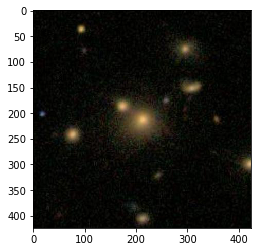

torch.Size([3, 64, 64])


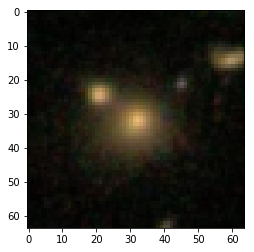

In [51]:
img = Image.open(image_folder + '/' + str(100128) + '.jpg').convert('RGB')
 


plt.imshow(np.asarray(img))
plt.show()

X= transforms.CenterCrop(224)(img)
X=transforms.Resize(64)(X)
X = transforms.ToTensor()(X)
print(X.shape)
npimg = X.numpy()
plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
plt.show()

In [52]:
class Dataset(data.Dataset):
  #'Characterizes a dataset for PyTorch'
    def __init__(self, list_IDs, labels,image_folder):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs
        self.transforms=transforms
        self.image_folder=image_folder

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        img = Image.open(self.image_folder + '/' + str(ID) + '.jpg')
        
        #to do self transforms 
        X= transforms.CenterCrop(224)(img)
        X=transforms.Resize(64)(X)
        X = transforms.ToTensor()(X)
        y = torch.from_numpy(np.array(self.labels[ID]))

       
        return X, y

In [53]:
data_transform = transforms.Compose([
  
        transforms.CenterCrop(224),

        transforms.ToTensor]
     )

In [54]:
training_set = Dataset(label_ids_training,label_values_training,image_folder)



In [55]:
for data, target in training_set:
    print(data.shape)
    print(target.shape)
    break;

torch.Size([3, 64, 64])
torch.Size([37])


In [56]:
params = {'batch_size': 64,
          'shuffle': True}
training_loader = DataLoader(training_set, **params)

In [57]:
for ix, (data,target) in enumerate(training_loader):
    print(data)
    print(target)
    break;

tensor([[[[0.0627, 0.0784, 0.0824,  ..., 0.0510, 0.0235, 0.0118],
          [0.0824, 0.0863, 0.0824,  ..., 0.0431, 0.0196, 0.0157],
          [0.0863, 0.0902, 0.0784,  ..., 0.0275, 0.0196, 0.0196],
          ...,
          [0.0157, 0.0157, 0.0157,  ..., 0.0000, 0.0000, 0.0039],
          [0.0118, 0.0196, 0.0196,  ..., 0.0157, 0.0196, 0.0157],
          [0.0078, 0.0118, 0.0118,  ..., 0.0275, 0.0392, 0.0314]],

         [[0.0824, 0.0980, 0.1020,  ..., 0.0510, 0.0235, 0.0118],
          [0.1020, 0.1059, 0.1020,  ..., 0.0314, 0.0118, 0.0078],
          [0.1059, 0.1098, 0.0980,  ..., 0.0078, 0.0000, 0.0000],
          ...,
          [0.0039, 0.0078, 0.0078,  ..., 0.0392, 0.0353, 0.0235],
          [0.0118, 0.0157, 0.0157,  ..., 0.0510, 0.0510, 0.0314],
          [0.0118, 0.0118, 0.0118,  ..., 0.0510, 0.0588, 0.0392]],

         [[0.0667, 0.0824, 0.0863,  ..., 0.0353, 0.0078, 0.0039],
          [0.0863, 0.0902, 0.0863,  ..., 0.0157, 0.0039, 0.0000],
          [0.0902, 0.0941, 0.0824,  ..., 0